# Basic object detection - Introduction
This is the third part of my [dezeenAI](https://github.com/adamsiemaszkiewicz/dezeenAI) project meant to build an object and colour detection search engine based on the [Dezeen.com](http://dezeen.com/)'s Interior category.

This notebook used YOLOv4 object detection system with the out-of-the-box classes and weights to tag the image dataset.

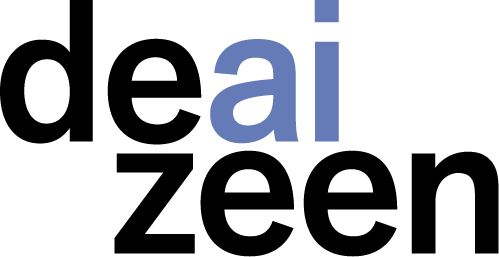

# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/dezeenAI /mydrive

# navigate to the working directory
%cd /mydrive

/content/gdrive/My Drive/Colab Notebooks/dezeenAI


## Libraries & functions
- `cv2` - computer vision library
- `matplotlib.pyplot` - visualisation & plotting library
- `sys` - system-specific parameters and functions
- `os.path` - common pathname manipulations

In [43]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os.path
import pandas as pd
import numpy as np
import timeit

#Darknet YOLOv4
YOLO (*You Only Look Once*) is an object detection system in real-time that recognizes various objects in a single enclosure. Currently it's one of the fastest and most precise object recognition systems.

Paper: [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/abs/2004.10934)

Code: [AlexeyAB/darknet](https://github.com/AlexeyAB/darknet)

Medium article: [YOLOv4 — the most accurate real-time neural network on MS COCO dataset.](https://medium.com/@alexeyab84/yolov4-the-most-accurate-real-time-neural-network-on-ms-coco-dataset-73adfd3602fe)

## Clone the repository
Let's first clone the official Darknet repository.

In [ ]:
# !git clone https://github.com/AlexeyAB/darknet

## GPU, OpenCV & CUDA
In order for the processing to run faster it's better to enable GPU acceleration within Colab notebook which will make the runtime 100 times faster. In order for Darknet to work propely we need to enable OpenCV and CUDA as well. To do so:

1. Navigate to `Edit -> Notebook settings -> Hardware Accelerator: GPU`
2. Use `sed -i` bash command to write some lines in-place to the `Makefile` to enable OpenCV, GPU and CUDNN.

In [ ]:
# %cd /mydrive/darknet
# !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !sed -i 's/GPU=0/GPU=1/' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

## Verify CUDA
CUDA is a parallel computing platform and application programming interface model created by Nvidia. It allows to use a CUDA-enabled graphics processing unit.

In [ ]:
# !/usr/local/cuda/bin/nvcc --version

## Make Darknet
`make` command builds Darknet and creates executables to run or train object detectors

In [ ]:
# !make

## Weights
YOLOv4 comes with pre-trained weights trained on 80 object categories of [MS COCO Dataset](https://cocodataset.org/) which is a good starting point for further development. Let's download them from the official Darknet repository using `wget`.

In [ ]:
# !wget -nc https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Detection model

## Images DataFrame

In [38]:
df = pd.read_pickle('files/images_colours.pkl')
df = df[::-1]
df.reset_index(drop=True, inplace=True)
df

,id,url,path,colours,distribution
0,15,http://static.dezeen.com/uploads/2006/11/k.jpg,/mydrive/data/dezeen/15/k.jpg,"[[65.33333333333334, 51.69444444444444, 28.75]...","[0.140625, 0.0390625, 0.2109375, 0.0703125, 0...."
1,15,http://static.dezeen.com/uploads/2006/11/q.jpg,/mydrive/data/dezeen/15/q.jpg,"[[124.81395348837209, 107.02325581395348, 76.9...","[0.16796875, 0.11328125, 0.01953125, 0.1679687..."
2,15,http://static.dezeen.com/uploads/2006/11/c.jpg,/mydrive/data/dezeen/15/c.jpg,"[[51.434782608695656, 41.608695652173914, 26.3...","[0.08984375, 0.10546875, 0.015625, 0.0703125, ..."
3,15,http://static.dezeen.com/uploads/2006/11/b.jpg,/mydrive/data/dezeen/15/b.jpg,"[[121.61904761904762, 99.0952380952381, 62.238...","[0.08203125, 0.3359375, 0.06640625, 0.07421875..."
4,15,https://static.dezeen.com/uploads/2006/11/1dez...,/mydrive/data/dezeen/15/1dezeen_november-07.jpg,"[[33.75, 24.66666666666667, 10.666666666666664...","[0.046875, 0.109375, 0.0390625, 0.1640625, 0.0..."
...,...,...,...,...,...
47172,1595387,https://static.dezeen.com/uploads/2020/12/spic...,/mydrive/data/dezeen/1595387/spice-and-barley-...,"[[244.44444444444446, 199.55555555555554, 137....","[0.03515625, 0.10546875, 0.09765625, 0.0625, 0..."
47173,1595387,https://static.dezeen.com/uploads/2020/12/spic...,/mydrive/data/dezeen/1595387/spice-and-barley-...,"[[23.441176470588232, 10.411764705882355, 6.76...","[0.1328125, 0.10546875, 0.15625, 0.05859375, 0..."
47174,1595387,https://static.dezeen.com/uploads/2020/12/spic...,/mydrive/data/dezeen/1595387/spice-and-barley-...,"[[109.44444444444444, 76.5, 41.111111111111114...","[0.0703125, 0.04296875, 0.12109375, 0.18359375..."
47175,1595387,https://static.dezeen.com/uploads/2020/12/spic...,/mydrive/data/dezeen/1595387/spice-and-barley-...,"[[36.272727272727266, 55.0, 84.18181818181819]...","[0.04296875, 0.18359375, 0.125, 0.10546875, 0...."


## Helper functions

In [39]:
def showIMG(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(
      image,
      (3*width, 3*height),
      interpolation = cv2.INTER_CUBIC
      )

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis('off')
  plt.imshow(
      cv2.cvtColor(
          resized_image,
          cv2.COLOR_BGR2RGB
          )
      )
  plt.show()

## Test
Darknet is now built and ready to run detections using YOLOv4 and pre-trained weights. It can already detect 80 classes of COCO Dataset. Let's test its performance on a pre-uploaded test picture.

- `./darknet detector test` - YOLOv4 detection function
- `coco.data` - dataset configuration
- `yolov4.cfg` - system architecture configuration
- `yolov4.weights` - pre-trained weights
- `-dont_show` - skips outputting the prediction picture (Notebook shows an error when trying to display the prediction) 
- `-tresh 0.5` - sets the treshold value for predictions

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
  

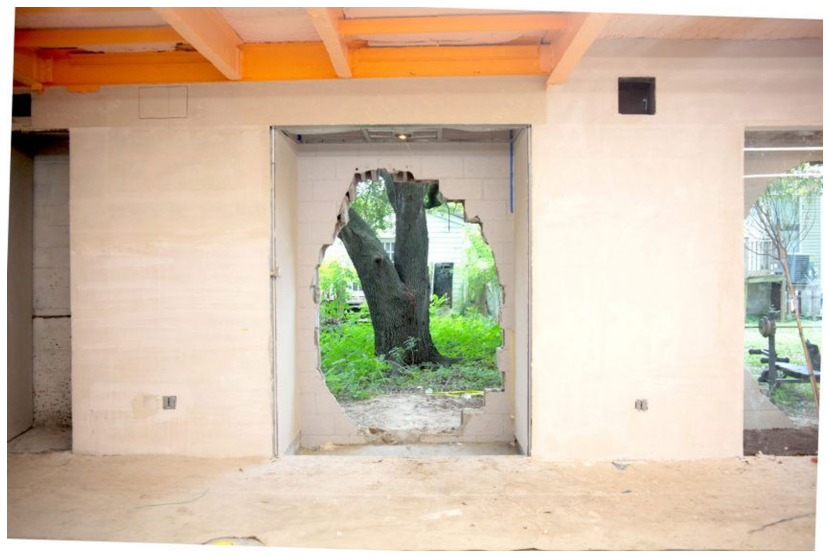

/content/gdrive/My Drive/Colab Notebooks/dezeenAI


In [40]:
# navigate to darknet directory
%cd darknet

# extract a random image path
path = df['path'][np.random.randint(0, df.shape[0])]

# make sure the permissions are ok
!chmod +x ./darknet

# run a YOLOv4 detector
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -thresh 0.5 {path}

# show the image with object detection predictions
showIMG('predictions.jpg')

# navigate back to the working directory
%cd /mydrive

## Split dataset
1. Let's divide our dataset into smaller chunks to be able to do the predictions on smaller batches.
2. Save the list of split files into a list to iterate through

In [41]:
%cd /mydrive/files
%mkdir -p tmp

paths = df['path']

chunksize = 2000

for n in range(int(len(paths)/chunksize)+1):

  start = n*chunksize
  end = ((n+1)*chunksize)-1

  if end > len(paths): 
    end = len(paths)
  
  filename = 'dezeen-images-{}.txt'.format(n)
  content = '\n'.join(paths[start:end])  

  f = open('tmp/'+filename, 'w')
  f.write(content)
  f.close()

%cd /mydrive/files/tmp
chunks = [] 

for filename in os.listdir(os.getcwd()):
  if filename.startswith('dezeen-images-'):
    chunks.append('/mydrive/files/tmp/'+filename)

%cd /mydrive

chunks

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/files
/content/gdrive/My Drive/Colab Notebooks/dezeenAI/files/tmp
/content/gdrive/My Drive/Colab Notebooks/dezeenAI


['/mydrive/files/tmp/dezeen-images-0.txt',
 '/mydrive/files/tmp/dezeen-images-2.txt',
 '/mydrive/files/tmp/dezeen-images-3.txt',
 '/mydrive/files/tmp/dezeen-images-1.txt',
 '/mydrive/files/tmp/dezeen-images-4.txt',
 '/mydrive/files/tmp/dezeen-images-5.txt',
 '/mydrive/files/tmp/dezeen-images-6.txt',
 '/mydrive/files/tmp/dezeen-images-7.txt',
 '/mydrive/files/tmp/dezeen-images-9.txt',
 '/mydrive/files/tmp/dezeen-images-8.txt',
 '/mydrive/files/tmp/dezeen-images-10.txt',
 '/mydrive/files/tmp/dezeen-images-11.txt',
 '/mydrive/files/tmp/dezeen-images-12.txt',
 '/mydrive/files/tmp/dezeen-images-13.txt',
 '/mydrive/files/tmp/dezeen-images-14.txt',
 '/mydrive/files/tmp/dezeen-images-15.txt',
 '/mydrive/files/tmp/dezeen-images-16.txt',
 '/mydrive/files/tmp/dezeen-images-17.txt',
 '/mydrive/files/tmp/dezeen-images-18.txt',
 '/mydrive/files/tmp/dezeen-images-19.txt',
 '/mydrive/files/tmp/dezeen-images-20.txt',
 '/mydrive/files/tmp/dezeen-images-21.txt',
 '/mydrive/files/tmp/dezeen-images-22.txt'

## Scan dataset
Darknet is now built and ready to run detections using YOLOv4 and pre-trained weights. It can already detect 80 classes of COCO Dataset. Let's test its performance on a pre-uploaded test picture.

- `./darknet detector test` - YOLOv4 detection function
- `coco.data` - dataset configuration
- `yolov4.cfg` - system architecture configuration
- `yolov4.weights` - pre-trained weights
- `-dont_show` - skips outputting the prediction picture (Notebook shows an error when trying to display the prediction) 
- `-tresh 0.5` - sets the treshold value for predictions
- `dezeen_results.json` - contains saved data
- `dezeen_images.txt` - contains list of images to evaluate

In [ ]:
# start the timer and print the information
start = timeit.default_timer()
print('\nStarting. This might take a few hours to complete...\n')

%cd /mydrive/darknet
!chmod +x ./darknet

for n, chunk in enumerate(chunks):
  input = chunk
  output = '/mydrive/files/tmp/dezeen_results-{}.json'.format(n)
  if os.path.isfile(output):
    print('{}: file already exists! Continuing...'.format(output))
  else:
    !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -ext_output -out {output} < {input}

%cd /mydrive

# stop the timer and print runtime duration
stop = timeit.default_timer() 
print('Runtime: {} seconds.'.format(int(stop-start)))

Streaming output truncated to the last 5000 lines.
chair: 44%	(left_x:  111   top_y:  293   width:   32   height:   22)
chair: 44%	(left_x:  195   top_y:  332   width:   57   height:  110)
wine glass: 74%	(left_x:  201   top_y:  298   width:   14   height:   27)
chair: 95%	(left_x:  247   top_y:  333   width:   93   height:  117)
wine glass: 68%	(left_x:  276   top_y:  305   width:   10   height:   22)
wine glass: 49%	(left_x:  292   top_y:  308   width:   10   height:   30)
wine glass: 71%	(left_x:  326   top_y:  309   width:   11   height:   25)
wine glass: 60%	(left_x:  336   top_y:  313   width:   13   height:   31)
wine glass: 53%	(left_x:  338   top_y:  314   width:   11   height:   19)
chair: 94%	(left_x:  341   top_y:  344   width:   81   height:  106)
cup: 32%	(left_x:  369   top_y:  321   width:   13   height:   16)
wine glass: 32%	(left_x:  369   top_y:  321   width:   13   height:   16)
chair: 97%	(left_x:  410   top_y:  350   width:   41   height:  100)
wine glass: 75%	(le

# Update the DataFrame

# References

- https://www.analyticssteps.com/blogs/introduction-yolov4
- https://www.youtube.com/watch?v=mmj3nxGT2YQ
- https://blog.roboflow.com/training-yolov4-on-a-custom-dataset/
- https://github.com/pjreddie/darknet/issues/1088
- https://medium.com/ai-world/how-to-train-yolov4-for-custom-objects-detection-in-google-colab-1e934b8ef685
- https://stackoverflow.com/questions/64022836/how-to-train-new-classes-on-pretrained-yolov4-model-in-darknet
- https://github.com/DucLeTrong/YOLOv4_with_OpenImagesV4_GoogleColab 


function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)




function ClickConnect(){

console.log("Working"); 
document.querySelector("#comments > span").click() 
}
setInterval(ClickConnect,5000)




https://stackoverflow.com/questions/57113226/how-to-prevent-google-colab-from-disconnecting

I tried the codes above but they did not work for me. So here is my JS code for reconnecting.

let interval = setInterval(function(){
let ok = document.getElementById('ok');
if(ok != null){
   console.log("Connect pushed");
ok.click();
}},60000)
You can use it with the same way (run it on the console of your browser) to run it. If you want to stop the script, you can enter clearInterval(interval) and want to run again setInterval(interval).

I hope this helps you.



function ClickConnect(){
console.log("Working"); 
document.querySelector("paper-icon-button").click()
}
Const myjob = setInterval(ClickConnect, 60000)



function ClickRefresh(){
    console.log("Clicked on refresh button"); 
    document.querySelector("paper-icon-button").click()
}
setInterval(ClickRefresh, 60000)

Version 2: If you would like to be able to stop the function, here is the new code:

var startClickConnect = function startClickConnect(){
    var clickConnect = function clickConnect(){
        console.log("Connnect Clicked - Start");
        document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
        console.log("Connnect Clicked - End"); 
    };

    var intervalId = setInterval(clickConnect, 60000);

    var stopClickConnectHandler = function stopClickConnect() {
        console.log("Connnect Clicked Stopped - Start");
        clearInterval(intervalId);
        console.log("Connnect Clicked Stopped - End");
    };

    return stopClickConnectHandler;
};

var stopClickConnect = startClickConnect();
In order to stop, call:

stopClickConnect();